In [1]:
# complex networks package - guide https://networkx.org/ 
import networkx as nx

# visualization packages - https://matplotlib.org/ 
import matplotlib.pyplot as plt
%matplotlib inline
from networkx.drawing.nx_agraph import graphviz_layout

# n-dinsional array tool - https://numpy.org/ 
import numpy as np
    
import math

from numpy import linalg as LA


import matplotlib.colors as mcolors
from scipy.linalg import eig

import random
import pandas as pd
import geopandas as gpd

from node2vec import Node2Vec

from sklearn.decomposition import PCA
from numpy import linalg as LA

In [2]:
Streets = pd.read_csv('streets.csv')
Nodes = pd.read_csv('nodes.csv')
plotter = pd.read_csv('plotter(1).csv')

In [3]:
G = nx.Graph()
position = Nodes
position['positions'] = Nodes[['x','y']].apply(lambda i: (i['x'],i['y']) , axis =1)
positions = position[['osmid','positions']].set_index('osmid').to_dict()

edges_weights = Streets[['u','v','length']]
edges_weights['edges']= edges_weights[['u','v']].apply(lambda i: (i['u'],i['v']) , axis =1)
edges_weights['weights']= edges_weights[['length']].apply(lambda i: {'weight' : i['length']}, axis =1)
edges_weights_dict = edges_weights[['edges','weights']].set_index('edges').to_dict()

#G.add_nodes_from(Nodes['osmid'])
G.add_edges_from(Streets[['u','v']].apply(lambda i: (i['u'],i['v']) , axis =1))
nx.set_edge_attributes(G,  edges_weights_dict['weights'])


C:\Users\ruoji\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [4]:
G.remove_edges_from(nx.selfloop_edges(G))
G.remove_nodes_from(['u','v'])
other= [i for i in G.edges() ]


In [5]:
Streets

,Unnamed: 0,u,v,key,osmid,name,highway,maxspeed,oneway,reversed,length,geometry,lanes,ref,access,bridge,tunnel,width,junction
0,0,42421728,42432736,0,195743153,Central Park West,secondary,25 mph,False,False,86.258,"LINESTRING (-73.9600437 40.7980478, -73.959962...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,42421728,42435337,0,195743153,Central Park West,secondary,25 mph,False,True,85.345,"LINESTRING (-73.9600437 40.7980478, -73.960111...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,42421728,42421731,0,"[420625565, 420625573, 5668966]",West 106th Street,secondary,NaN,False,False,138.033,"LINESTRING (-73.9600437 40.7980478, -73.960166...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,42421731,42437916,0,5671485,Manhattan Avenue,residential,NaN,False,True,86.149,"LINESTRING (-73.9614745 40.7986542, -73.96197 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,42421731,42432737,0,195743186,Manhattan Avenue,residential,NaN,False,False,85.611,"LINESTRING (-73.9614745 40.7986542, -73.960979...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9872,9872,9987259802,6166413696,0,"[889906410, 1090370030]",NaN,motorway_link,NaN,True,False,129.596,"LINESTRING (-73.9748726 40.746052, -73.9747897...","['2', '4']",NaN,NaN,NaN,NaN,NaN,NaN
9873,9873,10128931543,42434105,0,46568312,12th Avenue,residential,NaN,False,False,76.655,"LINESTRING (-73.9584715 40.8206298, -73.958873...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9874,9874,10128931543,2383895311,0,46568312,12th Avenue,residential,NaN,False,True,90.938,"LINESTRING (-73.9584715 40.8206298, -73.958222...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
9875,9875,10128931543,10128931544,0,1106938541,West 134th Street,residential,NaN,False,False,54.904,"LINESTRING (-73.9584715 40.8206298, -73.958278...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
p = nx.shortest_path(G,source = 42422018, target = 4778174564)
p


[42422018,
 42437058,
 42441535,
 595314125,
 42425348,
 7910052385,
 61269400,
 61272997,
 247124101,
 247120348,
 2348991703,
 42446386,
 42453564,
 42440253,
 42432605,
 42443549,
 593854257,
 42453555,
 42443570,
 42453548,
 42437379,
 247085867,
 247084442,
 247081122,
 246650510,
 4899886584,
 4899886546,
 246580797,
 246579753,
 373903786,
 246580346,
 246580982,
 246648063,
 402480678,
 246649427,
 246890579,
 9609713318,
 9611529610,
 42440854,
 42440850,
 42436083,
 42440847,
 42424619,
 42426089,
 4142105813,
 42440838,
 4778174564]

In [7]:
path = nx.path_graph(p, create_using=G)

C:\Users\ruoji\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6
  """


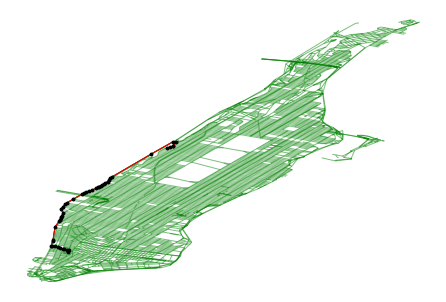

In [8]:
plt.figsize=(20, 20)
nx.draw(G, positions['positions'],  node_size=5, color ='green')
nx.draw_networkx_edges(G, positions['positions'], edgelist=other, width=1, alpha=0.5, edge_color="green")
nx.draw(path, positions['positions'],node_color='black', node_size= 8, edge_color = 'red')
plt.savefig('shortest_path',figsize=(20, 20))
plt.show()

In [9]:
plotter

,Unnamed: 0,M,WktGeom,Vol
0,0,1,"(40.746973543234255, -73.94288676891814)",103.214286
1,1,1,"(40.746898717024735, -73.94281891489817)",79.285714
2,2,1,"(40.762777267994345, -73.94198442267296)",100.607143
3,3,1,"(40.641396437511176, -73.94127535572665)",63.272727
4,4,1,"(40.68358056766485, -73.93816088238714)",194.500000
...,...,...,...,...
2099,2099,12,"(40.749172465327426, -74.0068118090647)",100.000000
2100,2100,12,"(40.74954760492175, -74.0065318441504)",238.000000
2101,2101,12,"(40.74990526694613, -74.00627031011764)",205.000000
2102,2102,12,"(40.75575067234263, -73.97290620781925)",446.000000


In [13]:
positions

{'positions': {42421728: (-73.9600437, 40.7980478),
  42421731: (-73.9614745, 40.7986542),
  42421737: (-73.9628734, 40.7992437),
  42421741: (-73.9656909, 40.8004295),
  42421745: (-73.9679955, 40.8013981),
  42421749: (-73.9685741, 40.8016452),
  42421751: (-73.9700504, 40.8022679),
  42421769: (-73.9750067, 40.7826383),
  42421772: (-73.9778254, 40.783828),
  42421775: (-73.9795827, 40.7845691),
  42421776: (-73.9806732, 40.7850352),
  42421778: (-73.9820041, 40.7855915),
  42421783: (-73.9313239, 40.8593291),
  42421785: (-73.930122, 40.858744),
  42421786: (-73.927625, 40.859012),
  42421791: (-73.926786, 40.859944),
  42421800: (-73.9703125, 40.7839869),
  42421803: (-73.9731496, 40.7851818),
  42421806: (-73.9759753, 40.7863627),
  42421809: (-73.9776927, 40.7870877),
  42421810: (-73.9788225, 40.7875711),
  42421820: (-73.9810702, 40.788486),
  42421828: (-73.976212, 40.725326),
  42421852: (-73.9568234, 40.8126219),
  42421857: (-73.9598214, 40.8138307),
  42421865: (-73.96069